<a href="https://colab.research.google.com/github/ankitgurjarr/summer-training/blob/main/Day6/ANN_for_Image_Data_Practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Neural Network

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout
from keras import optimizers
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


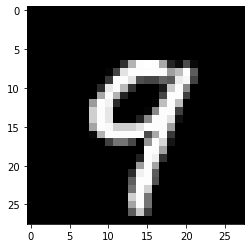

In [ ]:
print("Label:",y_test[12:13])
plt.imshow(x_test[12:13].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 32)                25120     
                                                                 
 dense_86 (Dense)            (None, 32)                1056      
                                                                 
 dense_87 (Dense)            (None, 32)                1056      
                                                                 
 dense_88 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# BELOW WE ARE TRYING WITH TANH OR RELU

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 32)                25120     
                                                                 
 dense_90 (Dense)            (None, 32)                1056      
                                                                 
 dense_91 (Dense)            (None, 32)                1056      
                                                                 
 dense_92 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#above we are using tanh as the activation function as opposite to sigmoid

### Weights before Training

[[array([[ 0.03729689, -0.01326261,  0.06636835, ..., -0.07772367,
        -0.05778715,  0.07127016],
       [ 0.01888392,  0.02304902,  0.01553266, ..., -0.00656274,
        -0.05346792, -0.0695776 ],
       [-0.08015138, -0.02094319, -0.01946247, ..., -0.01267572,
        -0.04467621,  0.02057645],
       ...,
       [-0.03151669,  0.00415298, -0.00598611, ..., -0.05345165,
        -0.02727037, -0.05073649],
       [ 0.00146759,  0.07562666, -0.07488942, ..., -0.04639813,
         0.04879675,  0.04792792],
       [ 0.00434653,  0.02948638, -0.0775401 , ..., -0.03486832,
        -0.00303791, -0.014995  ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)], [array([[ 0.23893532, -0.01541382,  0.2865977 , ...,  0.22525385,
         0.30233285,  0.01476005],
       [-0.16677903, -0.06112915, -0.13072605, ...,  0.02414361,
        -0.13057254, -0.24803747],
  

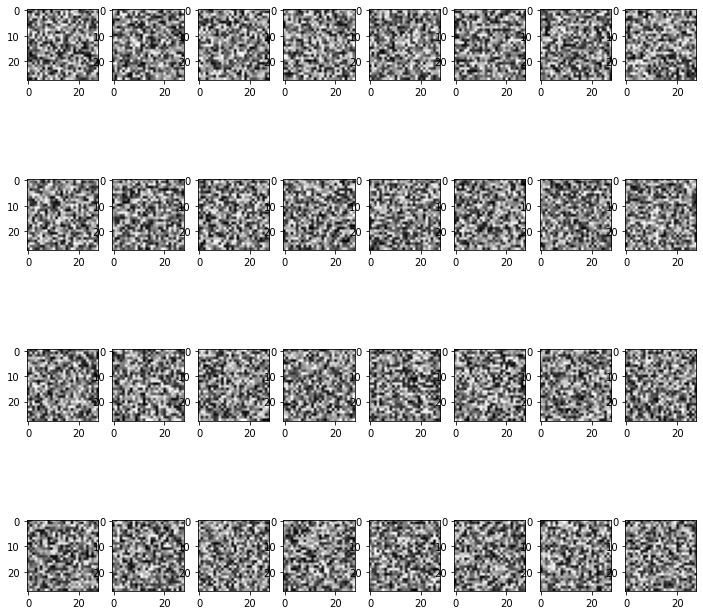

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
print(w)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
epochs=10
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4571 - accuracy: 0.8821
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2100 - accuracy: 0.9384
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1654 - accuracy: 0.9520
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1387 - accuracy: 0.9585
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1207 - accuracy: 0.9639
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1072 - accuracy: 0.9683
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0964 - accuracy: 0.9710
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0888 - accuracy: 0.9736
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0814 - accuracy: 0.9754
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0760 - accuracy: 0.9772

In [ ]:
#as seen above tanh gives better accuracy try with RELU

### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11243630200624466
Test accuracy: 0.9682000279426575


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


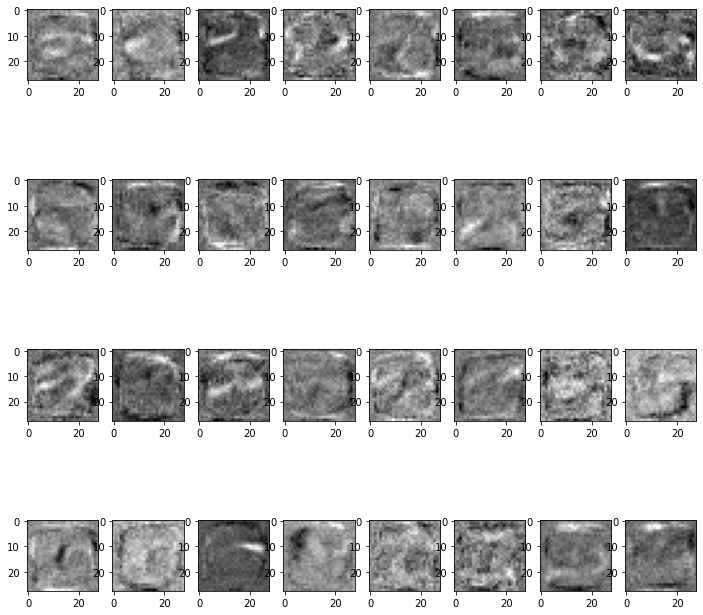

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[88:89])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [4.3374716e-06 3.8070633e-05 4.2991785e-05 3.0435061e-08 1.6565597e-05
 8.9346059e-07 9.9989319e-01 7.1403576e-08 4.8698422e-07 3.3306444e-06]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


### Ground truth

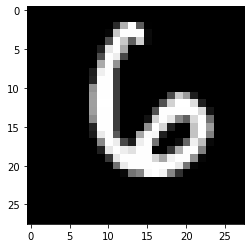

In [ ]:
# Write the index of the test sample to show
plt.imshow(x_test[88:89].reshape(28,28),cmap='gray')
plt.show()

### User Input

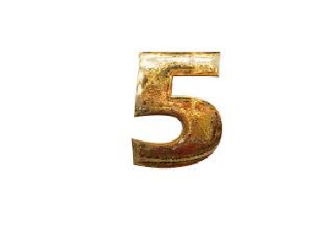

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/content/image.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

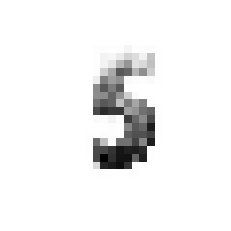

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/image.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [6.6432345e-04 1.2380465e-02 7.1947831e-01 3.1201311e-03 1.3008899e-04
 1.3933910e-02 2.3940268e-01 1.0337393e-02 2.5343259e-05 5.2725145e-04]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit:
 2


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0713 - accuracy: 0.9785
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0657 - accuracy: 0.9805
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0614 - accuracy: 0.9815
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0579 - accuracy: 0.9828
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0546 - accuracy: 0.9832
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9846
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0487 - accuracy: 0.9853
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0461 - accuracy: 0.9862
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0432 - accuracy: 0.9867
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0415 - accuracy: 0.9876

### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 8)                 6280      
                                                                 
 dense_94 (Dense)            (None, 8)                 72        
                                                                 
 dense_95 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0080 - accuracy: 0.4382 - val_loss: 1.7221 - val_accuracy: 0.6344
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4827 - accuracy: 0.7253 - val_loss: 1.2537 - val_accuracy: 0.7839
Epoch 3/10
469/469 [===========

### Relu Activation Function

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128)               100480    
                                                                 
 dense_97 (Dense)            (None, 32)                4128      
                                                                 
 dense_98 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.8641 - accuracy: 0.8161 - val_loss: 0.3550 - val_accuracy: 0.9105
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2867 - accuracy: 0.9228 - val_loss: 0.2383 - val_accuracy: 0.9324
Epoch 3/10
469/469 [=======

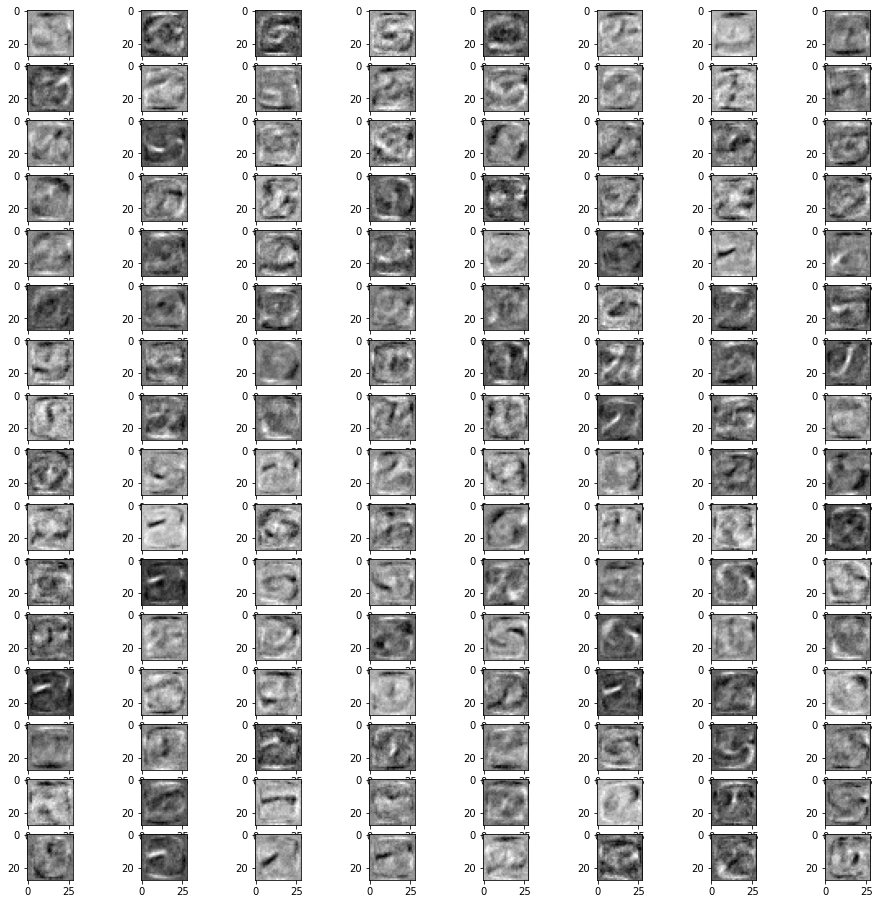

In [ ]:
#first_layer_size = 8
first_layer_size =128
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell 
# below we are trying with fewer hidden layers

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 8)                 6280      
                                                                 
 dense_100 (Dense)           (None, 8)                 72        
                                                                 
 dense_101 (Dense)           (None, 8)                 72        
                                                                 
 dense_102 (Dense)           (None, 8)                 72        
                                                                 
 dense_103 (Dense)           (None, 8)                 72        
                                                                 
 dense_104 (Dense)           (None, 10)                90        
                                                                 
Total params: 6,658
Trainable params: 6,658
Non-train

In [ ]:
#below try withincreased epochs  try ifferent.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 64)                50240     
                                                                 
 dense_106 (Dense)           (None, 32)                2080      
                                                                 
 dense_107 (Dense)           (None, 16)                528       
                                                                 
 dense_108 (Dense)           (None, 8)                 136       
                                                                 
 dense_109 (Dense)           (None, 10)                90        
                                                                 
Total params: 53,074
Trainable params: 53,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [=============================

### Lower number of Layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 8)                 6280      
                                                                 
 dense_111 (Dense)           (None, 8)                 72        
                                                                 
 dense_112 (Dense)           (None, 8)                 72        
                                                                 
 dense_113 (Dense)           (None, 8)                 72        
                                                                 
 dense_114 (Dense)           (None, 8)                 72        
                                                                 
 dense_115 (Dense)           (None, 8)                 72        
                                                                 
 dense_116 (Dense)           (None, 8)               

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout((0.2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(32, activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_134 (Dense)           (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_135 (Dense)           (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_136 (Dense)           (None, 10)              

In [ ]:
#underfittingbelowaslowtraingbuthightestingaccuracy

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.95))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_82 (Dense)            (None, 64)                65600     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_84 (Dense)            (None, 10)              

In [ ]:
#underfitting

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.95))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.95))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 1024)              803840    
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_138 (Dense)           (None, 64)                65600     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_139 (Dense)           (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_140 (Dense)           (None, 10)              

In [ ]:
#RMSPROP optimizers

In [ ]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ImportError: ignored

In [ ]:
#sgd optimizer

In [ ]:
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ImportError: ignored

In [ ]:
#adam optimizer

In [ ]:
from keras.layers import Dropout
from keras.optimizers import Adam
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ImportError: ignored

In [ ]:
#ADAMAX OPTIMIZER

In [ ]:
#SGD IS SLOW LEARNER AS COMPARED RMS AND ADAM

In [ ]:
from keras.layers import Dropout
from keras.optimizers import Adamax

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adamax(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ImportError: ignored

In [ ]:
#NADAM OPTIMIZER

In [ ]:
from keras.layers import Dropout
from keras.optimizers import Nadam

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ImportError: ignored

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science